<a href="https://colab.research.google.com/github/nathalyAlarconT/GenAI_Workshops/blob/main/MultiAgents_Gemini_CrewAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an AI Content Agency with Gemini and Crew AI Agents

In this tutorial, we will use Gemini from Google AI Studio and Crew AI to create a digital Agency of content creation with the following structure.


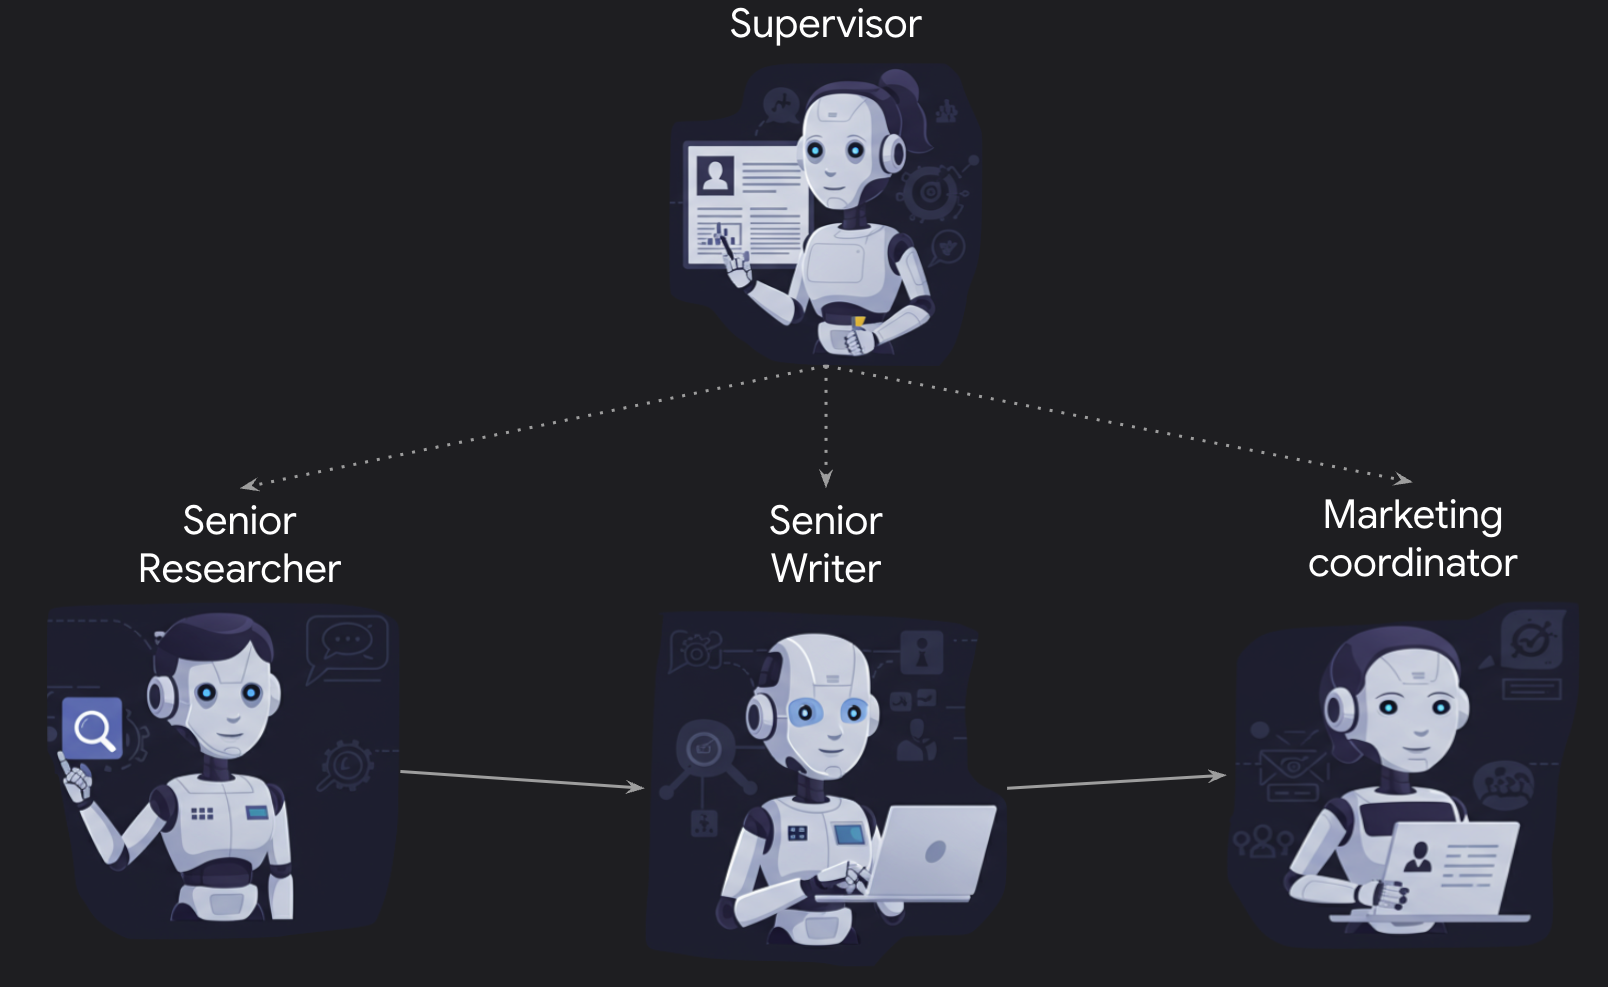

The Senior Researcher Agent will research a topic and provide all the data to the Writer Agent, who will write the final blog post. Then, the Marketing Coordinator will write social media posts to promote the blog post. Finally, the Supervisor will review and supervise the quality of the entire crew's work.

Let's begin creating the Crew :)

In [1]:
%%capture
!pip install --upgrade --quiet  langchain-core langchain_google_genai
!pip install --quiet crewai crewai-tools

In [2]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [3]:
import json
import os

Generate your Gemini API Key in https://aistudio.google.com/apikey

In [4]:
import os
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GoogleAIStudio')

# GOOGLE_API_KEY = ""

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
# os.environ["OPENAI_API_KEY"] = userdata.get('openai_key')

# Crew AI Setup

In [5]:
from crewai import Agent, Task, Crew, LLM
from crewai_tools import SerperDevTool

/usr/local/lib/python3.11/dist-packages/pydantic/fields.py:1093: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warn(


To use the Search tool, we need to add our Serper Search API KEY
You can create your free account here:
https://serper.dev/api-key

In [7]:
os.environ['SERPER_API_KEY'] = userdata.get('SERPER_API_KEY')

## Gemini Model Configuration

In [8]:
gemini_llm = LLM(
              model='gemini/gemini-2.5-flash',
              api_key=GOOGLE_API_KEY
            )

## Tools Definition

In [9]:
google_search_tool = SerperDevTool()

## Agents Definition

In [10]:
research_agent = Agent(
    role="Senior Research",
	  goal="Get the most important facts about {topic} ,"
          "organize the information, so it can be used it later to "
          "write a blog post about it.",
	  backstory=("You work at {company_name} in the Research Department"
          " Now you are working in the research process of {topic} "
          " You need to make sure that you are not making assumptions"
          " and that you are providing the most accurate information."),
    llm = gemini_llm,
    allow_delegation=False,
    max_iterations=2,
    verbose=True
)

In [11]:
writer_agent = Agent(
    role="Senior Writer",
	  goal="You have to write a blog post about {topic} ,"
         "You will be provided with all the important facts about {topic} ,"
         "The blog needs to be written in a way that is easy to read and understand."
         "Validate that the data is correct and make no assumptions",
	  backstory=("You work at {company_name} in the Writing Department"
          " Now you are working in the research process of {topic} "
          " You are recognized because your articles are the ones with more engagement"),
    llm = gemini_llm,
    allow_delegation=False,
    max_iterations=2,
    verbose=True
)

In [12]:
marketing_agent = Agent(
    role="Senior Marketing",
	  goal="You have to write a marketer post to promote the blog post about {topic} ,"
         "Use the most interesting parts of the blog post and add a "
         "call to action to the company site of {company_name}" ,
    backstory = "You work at {company_name} in the Marketing Department"
          " Your team will write and marketer post of  {topic} "
          " You manage: Facebook , Linkedin and X",

    llm = gemini_llm,
    allow_delegation=False,
    max_iterations=2,
    verbose=True
)

In [13]:
agency_supervisor_agent = Agent(
    role="Agency Supervisor",
	  goal="Make sure that your company : {company_name} "
          "Delivers a great blog article about {topic}" ,
    backstory = "You are a great leader of the agency for company {company_name}"
                "You have a great team that delivers quality blog posts",

    llm = gemini_llm,
    allow_delegation=True,
    max_iterations=2,
    verbose=True
)


## Tasks Definition

In [14]:
research_about_topic = Task(
    description=("Review among the public knowledge available about {topic}, "
                "get the most interesting points and prepare an initial document "
                "organized by sections "
                "with the most interesting facts about {topic}"
    ),
    expected_output=(
        "A detailed document with the most interesting topics about {topic} "
        "organized by sections. Include also a sections for: "
        "Origin, Interesting facts, Current implementations,  Future Steps"
        "Use markdown to separate sections."
    ),
	  tools=[google_search_tool],
    agent=research_agent,
    output_file = "Research.md"
)

In [15]:
write_about_topic = Task(
    description=("Write a blog post about {topic} , "
                " Do not include complex terminology"),
    expected_output=("A blog post about {topic}. The post should have 4 paragraphs. "
                      "Start with an open question.  Then describe the main concept on {topic}"
                      "Show the most interesting points. "
                      "Close the blog post creating expectation about the future Steps or projects of {topic}"
                      "Use markdown for the final blog post"),
    agent=writer_agent,
    output_file = "Blog_post.md"
)


In [16]:
write_for_media_topic = Task(
    description=("Write a post material to promote the blog about: {topic} , "
                " Do not include complex terminology"),
    expected_output=("Content to promote the  {topic}. "
                     "Create a post for: Linkedin, X and Facebook"),
    agent=marketing_agent,
    output_file = "Marketing_post.md"
)


## Crew Setup

In [17]:
crew = Crew(
  agents=[research_agent, writer_agent, marketing_agent, agency_supervisor_agent],
  tasks=[research_about_topic, write_about_topic, write_for_media_topic],
  verbose=True,
  llm=gemini_llm
)

# Crew Execution

In [18]:
inputs = {
    "company_name": "The Explainers",
    "topic": "AI in Latin America"
    }
result = crew.kickoff(inputs=inputs)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 66aca311-4ea1-4b04-a5f9-07039cab4b19                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Research                                                                                         │
│                                                                                                                 │
│  Task: Review among the public knowledge available about AI in Latin America, get the most interesting points   │
│  and prepare an initial document organized by sections with the most interesting facts about AI in Latin        │
│  America                                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Research                                                                                         │
│                                                                                                                 │
│  Thought: Action: Search the internet with Serper                                                               │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"AI in Latin America overview\"}"                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'AI in Latin America overview', 'type': 'search', 'num': 10, 'engine': 'google'},   │
│  'organic': [{'title': 'The AI Revolution is Here: How Will Latin America and the ...', 'link':                 │
│  'https://www.undp.org/latin-america/blog/ai-revolution-here-how-will-latin-america-and-caribbean-respond',     │
│  'snippet': "While AI is forecasted to contribute up to 5.4 percent of Latin America's GDP by 2030, equivalent  │
│  to approximately US$ 0.5 trillion, this number falls behind ...", 'position': 1}, {'title': 'Latin American    │
│  Artificial Intelligence Index (ILIA) Reconfirms Chile ...', 'link':                                            │
│  'https://www.cepal.org/en/pressreleases/latin-american-artificial-intelligence-index-ilia-reconfirms-chile-br  │
│  azil-and-uruguay', 'snippet': 'Chile stands out as the regional leader in AI with high investment in           │
│  technological infrastructure, training programs, and supporting policies.', 'position': 2}, {'title': 'Latin   │
│  America can set the standard in fueling and governing AI', 'link':                                             │
│  'https://www.weforum.org/stories/2025/01/latin-america-ai-standards-fueling-governing/', 'snippet': 'Latin     │
│  America can lead in powering and governing AI by leveraging renewables, biodiversity and cultural diversity    │
│  to foster inclusive and ...', 'position': 3}, {'title': 'AI Adoption in Latin America: How the Region Sets     │
│  Its Own Terms', 'link':                                                                                        │
│  'https://hispanicexecutive.com/ai-adoption-in-latin-america-how-the-region-sets-its-own-terms/', 'snippet':    │
│  "AI adoption in Latin America continues to grow but maintains a narrative of careful hopefulness. Latin        │
│  America's AI adoption rate stands at 40 ...", 'position': 4}, {'title': 'Foster innovation or mitigate risk?   │
│  AI regulation in Latin America', 'link':                                                                       │
│  'https://www.whitecase.com/insight-our-thinking/latin-america-focus-2024-ai-regulation', 'snippet': "Latin     │
│  America has recognized AI's potential as a catalyst for economic and social development while seeking to       │
│  address the challenges it poses, ...", 'position': 5}, {'title': "The great leap: Harnessing g...              │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Research                                                                                         │
│                                                                                                                 │
│  Thought: Thought: The initial search provides a good overview of AI in Latin America, touching upon its        │
│  economic impact, adoption rates, leading countries, regulatory efforts, and potential for social development.  │
│  I need to gather more specific details for each section: Origin, Interesting facts, Current implementations,   │
│  and Future Steps.                                                                                              │
│  Let's refine the search for "Origin" first, though it might be more about the *start of significant            │
│  development* rather than a precise origin date for AI itself in the region.                                    │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"history of AI development in Latin America\"}"                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'history of AI development in Latin America', 'type': 'search', 'num': 10,          │
│  'engine': 'google'}, 'organic': [{'title': "Mexico: the story and lessons behind Latin America's first AI      │
│  strategy", 'link':                                                                                             │
│  'https://caribbean.eclac.org/publications/mexico-story-and-lessons-behind-latin-americas-first-ai-strategy',   │
│  'snippet': 'What follows in this policy brief is the recount of the leaders of the initiative from government  │
│  and civil society, along with recommendations ...', 'position': 1}, {'title': 'AI Adoption in Latin America:   │
│  How the Region Sets Its Own Terms', 'link':                                                                    │
│  'https://hispanicexecutive.com/ai-adoption-in-latin-america-how-the-region-sets-its-own-terms/', 'snippet':    │
│  'Juan Loaiza dives into how cultural creativity and business acumen are informing inventive AI adoption in     │
│  Latin America.', 'position': 2}, {'title': 'The Artificial Intelligence Revolution in Latin America- IBS       │
│  Americas', 'link': 'https://blog.ibs-americas.com/en/2023/10/03/the-ai-revolution-in-latin-america-en/',       │
│  'snippet': 'In Latin America, AI poses a great potential to boost economic growth, increasing quality of life  │
│  and helping to address social challenges.', 'position': 3}, {'title': 'A Look at AI in LATAM Through the Eyes  │
│  of an Industry Expert', 'link':                                                                                │
│  'https://www.greenbook.org/insights/the-prompt-ai/a-look-at-ai-in-latam-through-the-eyes-of-an-industry-exper  │
│  t', 'snippet': 'A recent survey by IDC estimates that AI adoption averages 45% across the region, with Brazil  │
│  leading with 63% of companies using the technology ...', 'position': 4}, {'title': 'Forging Connections in     │
│  Latin America to Advance AI in Radiology', 'link': 'https://pmc.ncbi.nlm.nih.gov/articles/PMC9530756/',        │
│  'snippet': 'Chile recently approved its first National Artificial Intelligence Policy that brings together 70  │
│  priority actions and 185 initiatives that will impact the ...', 'position': 5}, {'title': 'Artificial          │
│  Intelligence Is Changing the World, and Latin America and ...', 'link': 'https:...                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Research                                                                                         │
│                                                                                                                 │
│  Thought: Thought: The "Origin" section seems to be more about the *onset of strategic AI development and       │
│  adoption* rather than a deep historical dive into AI research itself. The search results point to countries    │
│  like Mexico and Chile being early movers in developing national AI strategies. I will synthesize this for the  │
│  "Origin" section.                                                                                              │
│  Now, let's focus on "Interesting facts." The initial search provided some good data points, like GDP           │
│  contribution, adoption rates, and leading countries. I'll expand on these and look for more.                   │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"key statistics and facts about AI in Latin America\"}"                                   │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'key statistics and facts about AI in Latin America', 'type': 'search', 'num': 10,  │
│  'engine': 'google'}, 'organic': [{'title': 'Quantifying the Jobs Potential of AI in Latin America ... - World  │
│  Bank', 'link':                                                                                                 │
│  'https://projects.worldbank.org/en/results/2025/04/15/quantifying-the-jobs-potential-of-ai-in-latin-america-a  │
│  nd-the-caribbean', 'snippet': "Analysis found that 30–40% of jobs in Latin America and the Caribbean are       │
│  exposed in some way to generative artificial intelligence (Gen AI) , with exposure highly linked to a          │
│  country's economic status. Exposed jobs are more likely to be urban, formal, and higher-paying, and to         │
│  require higher education.", 'position': 1}, {'title': 'Artificial intelligence (AI) in Latin America -         │
│  statistics & facts - Statista', 'link':                                                                        │
│  'https://www.statista.com/topics/12175/artificial-intelligence-ai-in-latin-america/', 'snippet': 'Chile was    │
│  the highest-ranked Latin American country in 2023, with an index score of roughly 73. Brazil and Uruguay       │
│  followed, with AI index scores of 65.31 and ...', 'position': 2}, {'title': 'AI Adoption in Latin America:     │
│  How the Region Sets Its Own Terms', 'link':                                                                    │
│  'https://hispanicexecutive.com/ai-adoption-in-latin-america-how-the-region-sets-its-own-terms/', 'snippet':    │
│  "Latin America's AI adoption rate stands at 40 percent, trailing behind leading regions such as India (59      │
│  percent), the United Arab Emirates (58 ...", 'position': 3}, {'title': 'Latin America Artificial Intelligence  │
│  Market Size | 2033 - IMARC Group', 'link':                                                                     │
│  'https://www.imarcgroup.com/latin-america-artificial-intelligence-market', 'snippet': 'The Latin America       │
│  artificial intelligence market size reached USD 4.71 Billion in 2024 and grow at a CAGR of 22.9% to reach USD  │
│  30.20 Billion by 2033.', 'position': 4}, {'title': 'LatAm: AI use and adoption levels 2023 - Statista',        │
│  'link':                                                                                                        │
│  'https://www.statista.com/statistics/1456524/maturity-level-ai-adoption-in-businesses-latin-america/',         │
│  'snippet': 'In 2023, Colombia was the c...                                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Research                                                                                         │
│                                                                                                                 │
│  Thought: Thought: I have gathered good information for "Interesting facts" including market size, adoption     │
│  rates, job exposure, and economic contribution. Now I need to focus on "Current implementations" and "Future   │
│  Steps." I will search for examples of AI in use across different sectors and then for regulatory efforts and   │
│  strategic plans.                                                                                               │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"current AI implementations in Latin America sectors\"}"                                  │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'current AI implementations in Latin America sectors', 'type': 'search', 'num':     │
│  10, 'engine': 'google'}, 'organic': [{'title': "AI LatAm Roadmap: Key Sectors Driving the Region's Digital     │
│  Leap", 'link':                                                                                                 │
│  'https://www.ubs.com/global/en/investment-bank/insights-and-data/2025/driving-the-regions-digital-leap.html',  │
│  'snippet': "AI is revolutionizing LatAm's business environment, from banks to healthcare. Discover how AI is   │
│  narrowing the digital gap to developed markets ...", 'position': 1}, {'title': 'Latin American Artificial      │
│  Intelligence Index (ILIA) Reconfirms Chile ...', 'link':                                                       │
│  'https://www.cepal.org/en/pressreleases/latin-american-artificial-intelligence-index-ilia-reconfirms-chile-br  │
│  azil-and-uruguay', 'snippet': 'Chile stands out as the regional leader in AI with high investment in           │
│  technological infrastructure, training programs, and supporting policies.', 'position': 2}, {'title': 'A Look  │
│  at AI in LATAM Through the Eyes of an Industry Expert', 'link':                                                │
│  'https://www.greenbook.org/insights/the-prompt-ai/a-look-at-ai-in-latam-through-the-eyes-of-an-industry-exper  │
│  t', 'snippet': 'A recent survey by IDC estimates that AI adoption averages 45% across the region, with Brazil  │
│  leading with 63% of companies using the technology ...', 'position': 3}, {'title': "DeepSeek Reveals Latin     │
│  America's AI Crossroads", 'link':                                                                              │
│  'https://www.americasquarterly.org/article/deepseek-reveals-latin-americas-ai-crossroads/', 'snippet': 'In     │
│  Brazil, institutions like Fiocruz are already developing AI-driven solutions for the agriculture sector to     │
│  boost yields through precision ...', 'position': 4}, {'title': 'LatAm: AI implementation by business           │
│  department 2023 - Statista', 'link':                                                                           │
│  'https://www.statista.com/statistics/1456565/ai-implementation-by-business-department-latin-america/',         │
│  'snippet': "During a 2023 survey, nearly ** percent of respondents among business leaders in Latin America     │
│  reported having implemented AI in their company's ...", 'position': 5}, {'title'...                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:111: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  if ip and hasattr(ip, 'kernel') and hasattr(ip.kernel, '_parent_header'):

/usr/local/lib/python3.11/dist-packages/ipywidgets/widgets/widget_output.py:112: DeprecationWarning: 
Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  self.msg_id = ip.kernel._parent_header['header']['msg_id']

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Research                                                                                         │
│                                                                                                                 │
│  Thought: Thought: I have good information for "Current implementations" across various sectors like banking,   │
│  healthcare, and agriculture, and also about generative AI adoption. Now, I need to focus on "Future Steps,"    │
│  which largely involves AI regulation, national strategies, and potential growth areas.                         │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"search_query\": \"AI regulation and future strategies Latin America\"}"                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'AI regulation and future strategies Latin America', 'type': 'search', 'num': 10,   │
│  'engine': 'google'}, 'organic': [{'title': 'AI regulation in Latin America (LATAM): Brazil leads - Xenoss',    │
│  'link': 'https://xenoss.io/blog/latin-america-latam-ai-regulations', 'snippet': "Brazil is leading the charge  │
│  in Latin America with the region's first AI law. After a successful vote in December 2024, Bill No. 2338/2023  │
│  (aka the AI Bill) is set to become the country's national AI framework, centered on safeguarding fundamental   │
│  rights and preventing AI-driven discrimination .", 'position': 1}, {'title': 'Foster innovation or mitigate    │
│  risk? AI regulation in Latin America', 'link':                                                                 │
│  'https://www.whitecase.com/insight-our-thinking/latin-america-focus-2024-ai-regulation', 'snippet': 'While     │
│  Mexico has actively participated in international forums on AI regulation, currently there are no specific AI  │
│  laws or regulations in force ...', 'position': 2}, {'title': "Regulating AI on Latin America's Terms -         │
│  Americas Quarterly", 'link': 'https://americasquarterly.org/article/regulating-ai-on-latin-americas-terms/',   │
│  'snippet': 'Latin America faces a choice that will determine its economic future: develop AI governance on     │
│  its own terms, or become a regulatory colony ...', 'position': 3}, {'title': 'Smart AI regulation strategies   │
│  for Latin American policymakers', 'link':                                                                      │
│  'https://www.brookings.edu/articles/smart-ai-regulation-strategies-for-latin-american-policymakers/',          │
│  'snippet': 'Eduardo Levy Yeyati lays out essential steps for Latin America to adapt and create smart,          │
│  inclusive, and forward-looking AI regulation.', 'position': 4}, {'title': 'Mapping Artificial Intelligence     │
│  Regulation in Latin America', 'link':                                                                          │
│  'https://techpolicy.press/mapping-artificial-intelligence-regulation-in-latin-america', 'snippet': 'This       │
│  report is a guide to the AI landscape in Latin America by exploring the ways AI technology is being used, the  │
│  risks it presents, and what steps need to be ...                                                               │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Research                                                                                         │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  # AI in Latin America: An Overview                                                                             │
│                                                                                                                 │
│  This document provides a concise overview of Artificial Intelligence (AI) in Latin America, highlighting its   │
│  emergence, key characteristics, current applications, and future trajectories.                                 │
│                                                                                                                 │
│  ## Origin                                                                                                      │
│                                                                                                                 │
│  The "origin" of AI in Latin America isn't a singular historical event of inventing AI, but rather the *onset   │
│  of significant strategic development and adoption* of AI technologies and policies within the region.          │
│  *   **Early Policy Development:** Countries like Mexico and Chile have been at the forefront of developing     │
│  national AI strategies. Mexico's active participation in international forums on AI regulation and its early   │
│  efforts in developing a national AI strategy signify an early recognition of AI's importance.                  │
│  *   **National Strategies:** Chile has notably approved its first National Artificial Intelligence Policy,     │
│  comprising 70 priority actions and 185 initiatives, positioning it as a regional leader in AI readiness and    │
│  policy implementation.                                                                                         │
│  *   **Regulatory Frameworks:** Brazil is leading the charge in developing comprehensive AI legislation with    │
│  Bill No. 2338/2023 (the AI Bill), aiming to establish a national AI framework centered on safeguarding         │
│  fundamental rights and preventing AI-driven discrimination. This marks a significant step in the               │
│  formalization of AI governance in the region.                                                                  │
│                                                                                                                 │
│  ## Interesting Facts                                                                                           │
│                                                                                                                 │
│  *   **Economic Impact:** AI is forecasted to contribute up to 5.4% of Latin America's GDP by 2030, which is    │
│  equivalent to approximately US$ 0.5 trillion. There is a potential US$100 billion opportunity for Latin        │
│  America if it effectively leverages AI over the next decade.                                                   │
│  *   **Adoption Rates:** Latin America's AI adoption rate stands at approximately 40% across the region. For    │
│  generative AI, 37% of companies in the region are actively implementing it, while 45% are in the exploration   │
│  phase.                                                                                                         │
│  *   **Leading Countries:**                                                                                     │
│      *   **Chile** consistently ranks as the regional l

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: f956a8cf-96a5-4ecb-9135-7a530088cb6a                                                                     │
│  Agent: Senior Research                                                                                         │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Writer                                                                                           │
│                                                                                                                 │
│  Task: Write a blog post about AI in Latin America ,  Do not include complex terminology                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Writer                                                                                           │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  # AI in Latin America: A New Horizon                                                                           │
│                                                                                                                 │
│  Have you ever wondered how artificial intelligence is changing the game in Latin America? Far from being a     │
│  distant concept, AI is rapidly becoming a vital force, shaping economies and societies across the region.      │
│  It's not just about complex algorithms; it’s about a strategic shift, with countries like Mexico and Chile     │
│  leading the way in creating national plans and Brazil developing important new laws to guide its use. This     │
│  growing focus highlights a strong belief in AI's power to address local challenges and drive progress.         │
│                                                                                                                 │
│  The impact of AI in Latin America is truly remarkable. Experts predict it could add up to 5.4% to the          │
│  region's total economic output by 2030, potentially unlocking a US$100 billion opportunity in the next         │
│  decade. Currently, about 40% of companies in Latin America are already using AI, with a significant number     │
│  exploring newer AI tools. Chile consistently stands out as a regional leader, while Brazil shows high          │
│  adoption rates among businesses. Uruguay and Colombia are also making significant strides. Interestingly, AI   │
│  is expected to influence 30-40% of jobs, particularly those that are higher-paying and require more            │
│  education, and the overall AI market in Latin America is projected to surge from USD 4.71 billion in 2024 to   │
│  USD 30.20 billion by 2033.                                                                                     │
│                                                                                                                 │
│  Across Latin America, AI is already making a real difference in various parts of daily life. In healthcare,    │
│  it's helping improve services, like the work being done at institutions such as Fiocruz in Brazil. Farmers     │
│  are using AI to boost crop yields and manage resources more efficiently. The banking and finance sectors are   │
│  seeing big improvements in efficiency, fraud detection, and customer service thanks to AI. Even public         │
│  services are adopting AI-powered systems in cities across countries like Argentina, Brazil, and Colombia.      │
│  Local startups, too, are at the forefront, developing innovative AI solutions that are changing traditional    │
│  industries.                                                                                                    │
│                                                                                                                 │
│  Looking ahead, the future of AI in Latin America is bright and full of potential. Countries are actively       │
│  working on establishing clear rules and guidelines for AI, with Brazil's new AI Bill being a prime example,    │
│  focusing on fairness and preventing harm. More nations are expected to create their own strategic plans,       │
│  similar to Chile and Mexico, to guide investments in technology and education. Latin America has unique        │
│  strengths, like abundant renewable energy and diverse 

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: c01e18d5-7a21-42d1-8b2e-3a770d5aa6e4                                                                     │
│  Agent: Senior Writer                                                                                           │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Marketing                                                                                        │
│                                                                                                                 │
│  Task: Write a post material to promote the blog about: AI in Latin America ,  Do not include complex           │
│  terminology                                                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Marketing                                                                                        │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  Here are the social media posts to promote your blog "AI in Latin America: An Overview", tailored for          │
│  LinkedIn, X, and Facebook, using interesting facts from the blog and including a call to action to The         │
│  Explainers' company site, without complex terminology:                                                         │
│                                                                                                                 │
│  ---                                                                                                            │
│                                                                                                                 │
│  **LinkedIn Post:**                                                                                             │
│                                                                                                                 │
│  **Subject: AI in Latin America: Unlocking a US$0.5 Trillion Opportunity by 2030! 🚀**                          │
│                                                                                                                 │
│  Did you know Artificial Intelligence is rapidly transforming Latin America, with an expected contribution of   │
│  up to **US$0.5 trillion** to the region's GDP by 2030? Our latest blog post at The Explainers dives deep into  │
│  how this powerful shift is unfolding!                                                                          │
│                                                                                                                 │
│  Countries like Chile and Brazil are leading the charge, developing national strategies and groundbreaking      │
│  legislation to guide AI's ethical and inclusive growth. With 40% of companies already embracing AI, and the    │
│  market projected to surge to **US$30.20 billion by 2033**, Latin America is becoming a key player in the       │
│  global AI landscape.                                                                                           │
│                                                                                                                 │
│  Discover how AI is already making a real difference across sectors – from improving healthcare and boosting    │
│  agriculture to revolutionizing banking and enhancing public services. Learn about the vibrant startup scene    │
│  and what the future holds for AI development in this dynamic region.                                           │
│                                                                                                                 │
│  Ready to understand this exciting economic and technological revolution?                                       │
│                                                                                                                 │
│  👉 Read our full blog post to learn more: [Link to The Explainers' Blog Post]                                  │
│                                                                                                                 │
│  #AIinLatAm #LatinAmerica #ArtificialIntelligence #TechTrends #EconomicGrowth #Innovation                       │
│  #DigitalTransformation #TheExplainers #FutureOfWork                                                            │
│                                                          

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 7052e95e-e97d-4000-bc90-8c2788eb2e32                                                                     │
│  Agent: Senior Marketing                                                                                        │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 66aca311-4ea1-4b04-a5f9-07039cab4b19                                                                       │
│  Tool Args:                                                                                                     │
│  Final Output: Here are the social media posts to promote your blog "AI in Latin America: An Overview",         │
│  tailored for LinkedIn, X, and Facebook, using interesting facts from the blog and including a call to action   │
│  to The Explainers' company site, without complex terminology:                                                  │
│                                                                                                                 │
│  ---                                                                                                            │
│                                                                                                                 │
│  **LinkedIn Post:**                                                                                             │
│                                                                                                                 │
│  **Subject: AI in Latin America: Unlocking a US$0.5 Trillion Opportunity by 2030! 🚀**                          │
│                                                                                                                 │
│  Did you know Artificial Intelligence is rapidly transforming Latin America, with an expected contribution of   │
│  up to **US$0.5 trillion** to the region's GDP by 2030? Our latest blog post at The Explainers dives deep into  │
│  how this powerful shift is unfolding!                                                                          │
│                                                                                                                 │
│  Countries like Chile and Brazil are leading the charge, developing national strategies and groundbreaking      │
│  legislation to guide AI's ethical and inclusive growth. With 40% of companies already embracing AI, and the    │
│  market projected to surge to **US$30.20 billion by 2033**, Latin America is becoming a key player in the       │
│  global AI landscape.                                                                                           │
│                                                                                                                 │
│  Discover how AI is already making a real difference across sectors – from improving healthcare and boosting    │
│  agriculture to revolutionizing banking and enhancing public services. Learn about the vibrant startup scene    │
│  and what the future holds for AI development in this dynamic region.                                           │
│                                                                                                                 │
│  Ready to understand this exciting economic and technological revolution?                                       │
│                                                                                                                 │
│  👉 Read our full blog post to learn more: [Link to The Explainers' Blog Post]                                  │
│                                                                                                                 │
│  #AIinLatAm #LatinAmerica #ArtificialIntelligence #TechTrends #EconomicGrowth #Innovation                       │
│  #DigitalTransformation #TheExplainers #FutureOfWork    

# Results

In [19]:
from IPython.display import Markdown

## Final Blog Post

In [20]:
Markdown("Blog_post.md")

# AI in Latin America: A New Horizon

Have you ever wondered how artificial intelligence is changing the game in Latin America? Far from being a distant concept, AI is rapidly becoming a vital force, shaping economies and societies across the region. It's not just about complex algorithms; it’s about a strategic shift, with countries like Mexico and Chile leading the way in creating national plans and Brazil developing important new laws to guide its use. This growing focus highlights a strong belief in AI's power to address local challenges and drive progress.

The impact of AI in Latin America is truly remarkable. Experts predict it could add up to 5.4% to the region's total economic output by 2030, potentially unlocking a US$100 billion opportunity in the next decade. Currently, about 40% of companies in Latin America are already using AI, with a significant number exploring newer AI tools. Chile consistently stands out as a regional leader, while Brazil shows high adoption rates among businesses. Uruguay and Colombia are also making significant strides. Interestingly, AI is expected to influence 30-40% of jobs, particularly those that are higher-paying and require more education, and the overall AI market in Latin America is projected to surge from USD 4.71 billion in 2024 to USD 30.20 billion by 2033.

Across Latin America, AI is already making a real difference in various parts of daily life. In healthcare, it's helping improve services, like the work being done at institutions such as Fiocruz in Brazil. Farmers are using AI to boost crop yields and manage resources more efficiently. The banking and finance sectors are seeing big improvements in efficiency, fraud detection, and customer service thanks to AI. Even public services are adopting AI-powered systems in cities across countries like Argentina, Brazil, and Colombia. Local startups, too, are at the forefront, developing innovative AI solutions that are changing traditional industries.

Looking ahead, the future of AI in Latin America is bright and full of potential. Countries are actively working on establishing clear rules and guidelines for AI, with Brazil's new AI Bill being a prime example, focusing on fairness and preventing harm. More nations are expected to create their own strategic plans, similar to Chile and Mexico, to guide investments in technology and education. Latin America has unique strengths, like abundant renewable energy and diverse cultures, which could help it become a global leader in both developing and managing AI responsibly. The ultimate goal is to ensure that AI helps improve social conditions and reduces inequality, making it a tool for widespread development rather than just benefiting a few.

## Marketing For Blog Post

In [21]:
Markdown('Marketing_post.md')

Here are the social media posts to promote your blog "AI in Latin America: An Overview", tailored for LinkedIn, X, and Facebook, using interesting facts from the blog and including a call to action to The Explainers' company site, without complex terminology:

---

**LinkedIn Post:**

**Subject: AI in Latin America: Unlocking a US$0.5 Trillion Opportunity by 2030! 🚀**

Did you know Artificial Intelligence is rapidly transforming Latin America, with an expected contribution of up to **US$0.5 trillion** to the region's GDP by 2030? Our latest blog post at The Explainers dives deep into how this powerful shift is unfolding!

Countries like Chile and Brazil are leading the charge, developing national strategies and groundbreaking legislation to guide AI's ethical and inclusive growth. With 40% of companies already embracing AI, and the market projected to surge to **US$30.20 billion by 2033**, Latin America is becoming a key player in the global AI landscape.

Discover how AI is already making a real difference across sectors – from improving healthcare and boosting agriculture to revolutionizing banking and enhancing public services. Learn about the vibrant startup scene and what the future holds for AI development in this dynamic region.

Ready to understand this exciting economic and technological revolution?

👉 Read our full blog post to learn more: [Link to The Explainers' Blog Post]

#AIinLatAm #LatinAmerica #ArtificialIntelligence #TechTrends #EconomicGrowth #Innovation #DigitalTransformation #TheExplainers #FutureOfWork

---

**X (Twitter) Post:**

**AI in Latin America is booming! 🚀** Expected to add **US$0.5 TRILLION** to the region's economy by 2030. Chile, Brazil, and Uruguay are leading the way in adoption & strategy.

Discover how AI is transforming healthcare, finance, and more! 👇

Read The Explainers' blog: [Link to The Explainers' Blog Post]

#AI #LatAm #Tech #Innovation #Economy #TheExplainers #Future

---

**Facebook Post:**

🌟 **Huge News! AI is set to revolutionize Latin America – and it’s happening now!** 🌟

Have you wondered how Artificial Intelligence is changing everything from daily life to national economies in Latin America? Our new blog post at The Explainers breaks it all down!

Imagine AI contributing up to an astonishing **US$0.5 trillion** to Latin America's economy by 2030! Countries like Chile and Brazil are already at the forefront, creating smart plans and new laws to ensure AI benefits everyone. With the AI market set to grow to a massive **USD 30.20 billion by 2033**, the opportunities are immense!

From helping doctors improve healthcare in Brazil, to boosting crop yields for farmers, making banking safer, and even enhancing public services in major cities – AI is making a real difference on the ground.

Want to learn more about the fascinating journey of AI in Latin America, its current impact, and what's next?

Click here to read the full story on The Explainers' blog: [Link to The Explainers' Blog Post]

#AILatAm #LatinAmerica #ArtificialIntelligence #TechForGood #Innovation #FutureIsNow #TheExplainers #TechNews #DigitalTransformation

## Initial Research

In [22]:
Markdown('Research.md')

# AI in Latin America: An Overview

This document provides a concise overview of Artificial Intelligence (AI) in Latin America, highlighting its emergence, key characteristics, current applications, and future trajectories.

## Origin

The "origin" of AI in Latin America isn't a singular historical event of inventing AI, but rather the *onset of significant strategic development and adoption* of AI technologies and policies within the region.
*   **Early Policy Development:** Countries like Mexico and Chile have been at the forefront of developing national AI strategies. Mexico's active participation in international forums on AI regulation and its early efforts in developing a national AI strategy signify an early recognition of AI's importance.
*   **National Strategies:** Chile has notably approved its first National Artificial Intelligence Policy, comprising 70 priority actions and 185 initiatives, positioning it as a regional leader in AI readiness and policy implementation.
*   **Regulatory Frameworks:** Brazil is leading the charge in developing comprehensive AI legislation with Bill No. 2338/2023 (the AI Bill), aiming to establish a national AI framework centered on safeguarding fundamental rights and preventing AI-driven discrimination. This marks a significant step in the formalization of AI governance in the region.

## Interesting Facts

*   **Economic Impact:** AI is forecasted to contribute up to 5.4% of Latin America's GDP by 2030, which is equivalent to approximately US$ 0.5 trillion. There is a potential US$100 billion opportunity for Latin America if it effectively leverages AI over the next decade.
*   **Adoption Rates:** Latin America's AI adoption rate stands at approximately 40% across the region. For generative AI, 37% of companies in the region are actively implementing it, while 45% are in the exploration phase.
*   **Leading Countries:**
    *   **Chile** consistently ranks as the regional leader in AI, with an index score of roughly 73 in 2023, attributed to high investment in technological infrastructure, training programs, and supporting policies.
    *   **Brazil** follows closely with an AI index score of 65.31, leading in company AI adoption with 63% of businesses utilizing the technology.
    *   **Uruguay** is also a strong contender with an AI index score of 64.98.
    *   **Colombia** showed significant potential in AI according to business leaders in 2023.
*   **Job Exposure:** Analysis by the World Bank indicates that 30-40% of jobs in Latin America and the Caribbean are exposed in some way to generative AI. This exposure is highly correlated with a country's economic status, and the exposed jobs are typically urban, formal, higher-paying, and require higher education.
*   **Market Growth:** The Latin America artificial intelligence market size reached USD 4.71 billion in 2024 and is projected to grow at a Compound Annual Growth Rate (CAGR) of 22.9% to reach USD 30.20 billion by 2033.

## Current Implementations

AI is being increasingly adopted across various sectors in Latin America, addressing local challenges and driving innovation.

*   **Healthcare:** AI-driven solutions are being developed to improve healthcare services. For example, institutions like Fiocruz in Brazil are involved in such initiatives.
*   **Agriculture:** AI is utilized to boost yields through precision agriculture, optimizing farming practices and resource management.
*   **Banking and Finance:** AI is revolutionizing financial services, enhancing efficiency, fraud detection, and customer service.
*   **Public Services and Governance:** AI-powered surveillance systems have seen rapid adoption in Latin American cities, including Argentina, Brazil, Colombia, and Ecuador. There's a growing recognition of AI's potential for economic and social development, with efforts to address the challenges it poses.
*   **Service Economy:** Generative AI is seen as a key tool to revolutionize Latin America's service economy, enabling the region to solve persistent challenges and create new opportunities.
*   **Startups and Innovation:** Many startups led by Latin American developers are at the forefront of AI innovation, creating groundbreaking solutions and disrupting traditional industries.

## Future Steps

The future of AI in Latin America is characterized by a push for robust regulatory frameworks, strategic investments, and a focus on inclusive and ethical development.

*   **AI Regulation and Governance:**
    *   Several countries are actively pursuing or implementing AI legislation. Brazil's AI Bill is a notable example, focusing on fundamental rights and preventing discrimination.
    *   Discussions are ongoing in countries like Argentina, Chile, Colombia, Costa Rica, Mexico, and Peru regarding AI regulation.
    *   The region aims for a tailored approach to AI regulation that harmonizes global trends with local realities, ensuring that AI development benefits all segments of society and reduces inequality.
    *   The challenge for Latin America is to develop AI governance on its own terms, avoiding becoming merely a "regulatory colony" of more advanced regions.
*   **Strategic National Plans:** More countries are expected to follow Chile and Mexico's lead in developing comprehensive national AI strategies to guide investment in technological infrastructure, R&D, and human capital development.
*   **Leveraging Regional Strengths:** Latin America has the potential to lead in powering and governing AI by leveraging its abundant renewable energy sources, rich biodiversity, and diverse cultural landscape. This can foster inclusive and sustainable AI development.
*   **Addressing Social Challenges:** A key future step is to ensure that the adoption of AI is aligned with improving social conditions and reducing inequality across the region, making AI a tool for broad-based development rather than exacerbating existing disparities.
*   **Investment in Skills and Infrastructure:** Continued investment in AI training programs, technological infrastructure, and fostering a robust ecosystem for AI research and innovation will be crucial for sustained growth and competitiveness.